# AIM: Create and store dataframe containing all participant data relevant for current project

- First, the TDBRAIN dataset with the clinical + demographic data will be loaded, cleaned, and filtered to only contain the data relevant to the current project.
- Next, some descriptives will be investigated of the selected unbalanced sample.
- Lastly, some descriptives will be investigated of the rebalanced subsample of the selected sample.

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
# set folder containing participants data as working directory
working_directory = "D:\Documents\RU\Master_Neurobiology\Internship_jaar_2\Project\TD-BRAIN\TDBRAIN_participants_V2_data"
os.chdir(working_directory)
os.getcwd()

'D:\\Documents\\RU\\Master_Neurobiology\\Internship_jaar_2\\Project\\TD-BRAIN\\TDBRAIN_participants_V2_data'

In [3]:
# load participants data
df_full = pd.read_csv('TDBRAIN_participants_V2.tsv', sep='\t', decimal=',')
df_full = df_full[df_full['participants_ID'].notna()]
df_full

,participants_ID,DISC/REP,indication,formal_status,Dataset,Consent,sessSeason,sessTime,Responder,Remitter,...,BDI_post,rTMS PROTOCOL,ADHD_pre_Hyp_leading,ADHD_pre_Att_leading,ADHD_post_Att_leading,ADHD_post_Hyp_leading,NF Protocol,YBOCS_pre,YBOCS_post,Unnamed: 110
0,sub-19681349,REPLICATION,REPLICATION,REPLICATION,REPLICATION,YES,REPLICATION,REPLICATION,REPLICATION,REPLICATION,...,REPLICATION,2,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,NaN
1,sub-19681385,REPLICATION,REPLICATION,REPLICATION,REPLICATION,YES,REPLICATION,REPLICATION,REPLICATION,REPLICATION,...,REPLICATION,1,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,NaN
2,sub-19684666,REPLICATION,REPLICATION,REPLICATION,REPLICATION,YES,REPLICATION,REPLICATION,REPLICATION,REPLICATION,...,REPLICATION,1,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,NaN
3,sub-19686324,REPLICATION,REPLICATION,REPLICATION,REPLICATION,YES,REPLICATION,REPLICATION,REPLICATION,REPLICATION,...,REPLICATION,2,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,NaN
4,sub-19687321,REPLICATION,REPLICATION,REPLICATION,REPLICATION,YES,REPLICATION,REPLICATION,REPLICATION,REPLICATION,...,REPLICATION,3,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,REPLICATION,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,sub-88078657,DISCOVERY,INSOMNIA,INSOMNIA,NaN,YES,fall,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,sub-88078749,DISCOVERY,INSOMNIA,INSOMNIA,NaN,YES,winter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1344,sub-88078793,DISCOVERY,INSOMNIA,INSOMNIA,NaN,YES,winter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,sub-88078837,DISCOVERY,INSOMNIA,INSOMNIA,NaN,YES,winter,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# find number of participants in replication sample and in discovery sample
df_ses1 = df_full[df_full['sessID'] == 1]
print(df_ses1.shape)
df_ses1['DISC/REP'].value_counts()

(1259, 111)


DISC/REP
DISCOVERY      1153
REPLICATION     106
Name: count, dtype: int64

In [12]:
# only select relevant variables for current project
df_participants = df_full.loc[:, ('participants_ID', 'DISC/REP', 'indication', 'formal_status', 'Dataset', 'age', 'gender', 'sessID', 'nrSessions', 'EC', 'EO')]
df_participants = df_participants[df_participants['DISC/REP'] == 'DISCOVERY'] # select the discovery group

# create aggregated diagnosis variable from formal_status if known, and from indication if formal_status is UNKNOWN
df_participants['diagnosis'] = df_participants['formal_status']
df_participants.loc[df_participants['diagnosis'] == 'UNKNOWN', 'diagnosis'] = df_participants['indication']

df_participants

,participants_ID,DISC/REP,indication,formal_status,Dataset,age,gender,sessID,nrSessions,EC,EO,diagnosis
120,sub-87963457,DISCOVERY,BURNOUT,BURNOUT,NaN,NaN,0.0,1.0,1.0,1.0,1.0,BURNOUT
121,sub-87963593,DISCOVERY,BURNOUT,BURNOUT,NaN,52.90,1.0,1.0,1.0,1.0,1.0,BURNOUT
122,sub-87963725,DISCOVERY,SMC,UNKNOWN,NaN,77.99,0.0,1.0,1.0,1.0,1.0,SMC
123,sub-87963769,DISCOVERY,SMC,UNKNOWN,NaN,83.30,1.0,1.0,1.0,1.0,1.0,SMC
124,sub-87964717,DISCOVERY,SMC,UNKNOWN,NaN,58.29,0.0,1.0,2.0,1.0,1.0,SMC
...,...,...,...,...,...,...,...,...,...,...,...,...
1342,sub-88078657,DISCOVERY,INSOMNIA,INSOMNIA,NaN,58.59,1.0,1.0,1.0,1.0,1.0,INSOMNIA
1343,sub-88078749,DISCOVERY,INSOMNIA,INSOMNIA,NaN,37.22,0.0,1.0,1.0,1.0,1.0,INSOMNIA
1344,sub-88078793,DISCOVERY,INSOMNIA,INSOMNIA,NaN,48.54,1.0,1.0,1.0,1.0,1.0,INSOMNIA
1345,sub-88078837,DISCOVERY,INSOMNIA,INSOMNIA,NaN,24.63,1.0,1.0,1.0,1.0,1.0,INSOMNIA


In [13]:
# select top 5 diagnoses
top_5 = df_participants['diagnosis'].value_counts()[:5].index.tolist()
df_participants = df_participants[df_participants['diagnosis'].isin(top_5)]
df_participants['diagnosis'].astype('category')
df_participants['diagnosis'].value_counts()

diagnosis
MDD        323
ADHD       176
SMC        119
OCD         49
HEALTHY     47
Name: count, dtype: int64

In [14]:
# change variables to correct data types
dtypes_dict = {'participants_ID' : 'string', 'DISC/REP' : 'category',
                'indication' : 'category', 'formal_status' : 'category',
                'Dataset' : 'category', 'age' : 'float', 'gender' : 'int',
                'sessID' : 'int', 'nrSessions' : 'int', 'EC' : 'bool', 'EO' : 'bool', 'diagnosis' : 'category'}
df_participants = df_participants.astype(dtypes_dict)
df_participants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 122 to 1330
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   participants_ID  714 non-null    string  
 1   DISC/REP         714 non-null    category
 2   indication       713 non-null    category
 3   formal_status    714 non-null    category
 4   Dataset          218 non-null    category
 5   age              699 non-null    float64 
 6   gender           714 non-null    int32   
 7   sessID           714 non-null    int32   
 8   nrSessions       714 non-null    int32   
 9   EC               714 non-null    bool    
 10  EO               714 non-null    bool    
 11  diagnosis        714 non-null    category
dtypes: bool(2), category(5), float64(1), int32(3), string(1)
memory usage: 31.4 KB


In [15]:
# check for missing EC or EO recordings
print(df_participants[df_participants['EC'] == False].shape[0])
print(df_participants[df_participants['EO'] == False].shape[0])
df_participants[df_participants['EO'] == False]

0
0


,participants_ID,DISC/REP,indication,formal_status,Dataset,age,gender,sessID,nrSessions,EC,EO,diagnosis


In [26]:
# store dataframe as pickle file
df_participants.to_pickle('df_participants.pkl')
df_test = pd.read_pickle('df_participants.pkl')
df_test

,participants_ID,DISC/REP,indication,formal_status,Dataset,age,gender,sessID,nrSessions,EC,EO,diagnosis
122,sub-87963725,DISCOVERY,SMC,UNKNOWN,NaN,77.99,0,1,1,True,True,SMC
123,sub-87963769,DISCOVERY,SMC,UNKNOWN,NaN,83.30,1,1,1,True,True,SMC
124,sub-87964717,DISCOVERY,SMC,UNKNOWN,NaN,58.29,0,1,2,True,True,SMC
125,sub-87964717,DISCOVERY,SMC,UNKNOWN,NaN,61.06,0,3,2,True,True,SMC
126,sub-87965301,DISCOVERY,SMC,UNKNOWN,NaN,58.39,0,1,1,True,True,SMC
...,...,...,...,...,...,...,...,...,...,...,...,...
1326,sub-88077345,DISCOVERY,MDD,UNKNOWN,NaN,57.78,1,1,1,True,True,MDD
1327,sub-88077393,DISCOVERY,ADHD,UNKNOWN,NaN,14.69,1,1,1,True,True,ADHD
1328,sub-88077525,DISCOVERY,MDD,UNKNOWN,NaN,35.08,0,1,1,True,True,MDD
1329,sub-88077569,DISCOVERY,MDD,UNKNOWN,NaN,21.38,0,1,1,True,True,MDD


### Some descriptives of selected sample:

In [16]:
df_descriptives = df_participants.copy()
df_descriptives['age'] = df_descriptives['age'].round().astype('Int32') # round age to nearest year and convert to int
df_descriptives.sample(7)

,participants_ID,DISC/REP,indication,formal_status,Dataset,age,gender,sessID,nrSessions,EC,EO,diagnosis
1243,sub-88071361,DISCOVERY,ADHD,UNKNOWN,NaN,9,0,1,1,True,True,ADHD
1132,sub-88062409,DISCOVERY,MDD,UNKNOWN,NaN,28,0,1,1,True,True,MDD
1119,sub-88061193,DISCOVERY,OCD,OCD,OCD,20,1,1,1,True,True,OCD
1193,sub-88067449,DISCOVERY,ADHD,ADHD,ADHD_NF,34,0,1,1,True,True,ADHD
310,sub-88002789,DISCOVERY,MDD,MDD,MDD-rTMS,39,0,1,1,True,True,MDD
235,sub-87971065,DISCOVERY,SMC,UNKNOWN,NaN,69,1,1,1,True,True,SMC
687,sub-88025237,DISCOVERY,ADHD,UNKNOWN,NaN,10,1,1,1,True,True,ADHD


In [17]:
df_descriptives['diagnosis'].value_counts() # check distribution of diagnoses

diagnosis
MDD        323
ADHD       176
SMC        119
OCD         49
HEALTHY     47
Name: count, dtype: int64

#### Age distribution per diagnosis:

In [18]:
df_descriptives.groupby('diagnosis')['age'].describe()

C:\Users\tuur\AppData\Local\Temp\ipykernel_15468\3123023576.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_descriptives.groupby('diagnosis')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
ADHD,175.0,21.925714,14.1458,6.0,10.0,17.0,32.0,56.0
HEALTHY,37.0,32.108108,13.621437,18.0,22.0,28.0,40.0,77.0
MDD,323.0,45.309598,13.890548,17.0,35.0,46.0,55.0,78.0
OCD,49.0,33.22449,11.881823,17.0,24.0,30.0,37.0,76.0
SMC,115.0,65.478261,8.117933,54.0,58.0,64.0,72.0,88.0


C:\Users\tuur\AppData\Local\Temp\ipykernel_15468\1880572458.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axes = df_descriptives.hist(column='age', by='diagnosis', bins=30, figsize=(15, 15))


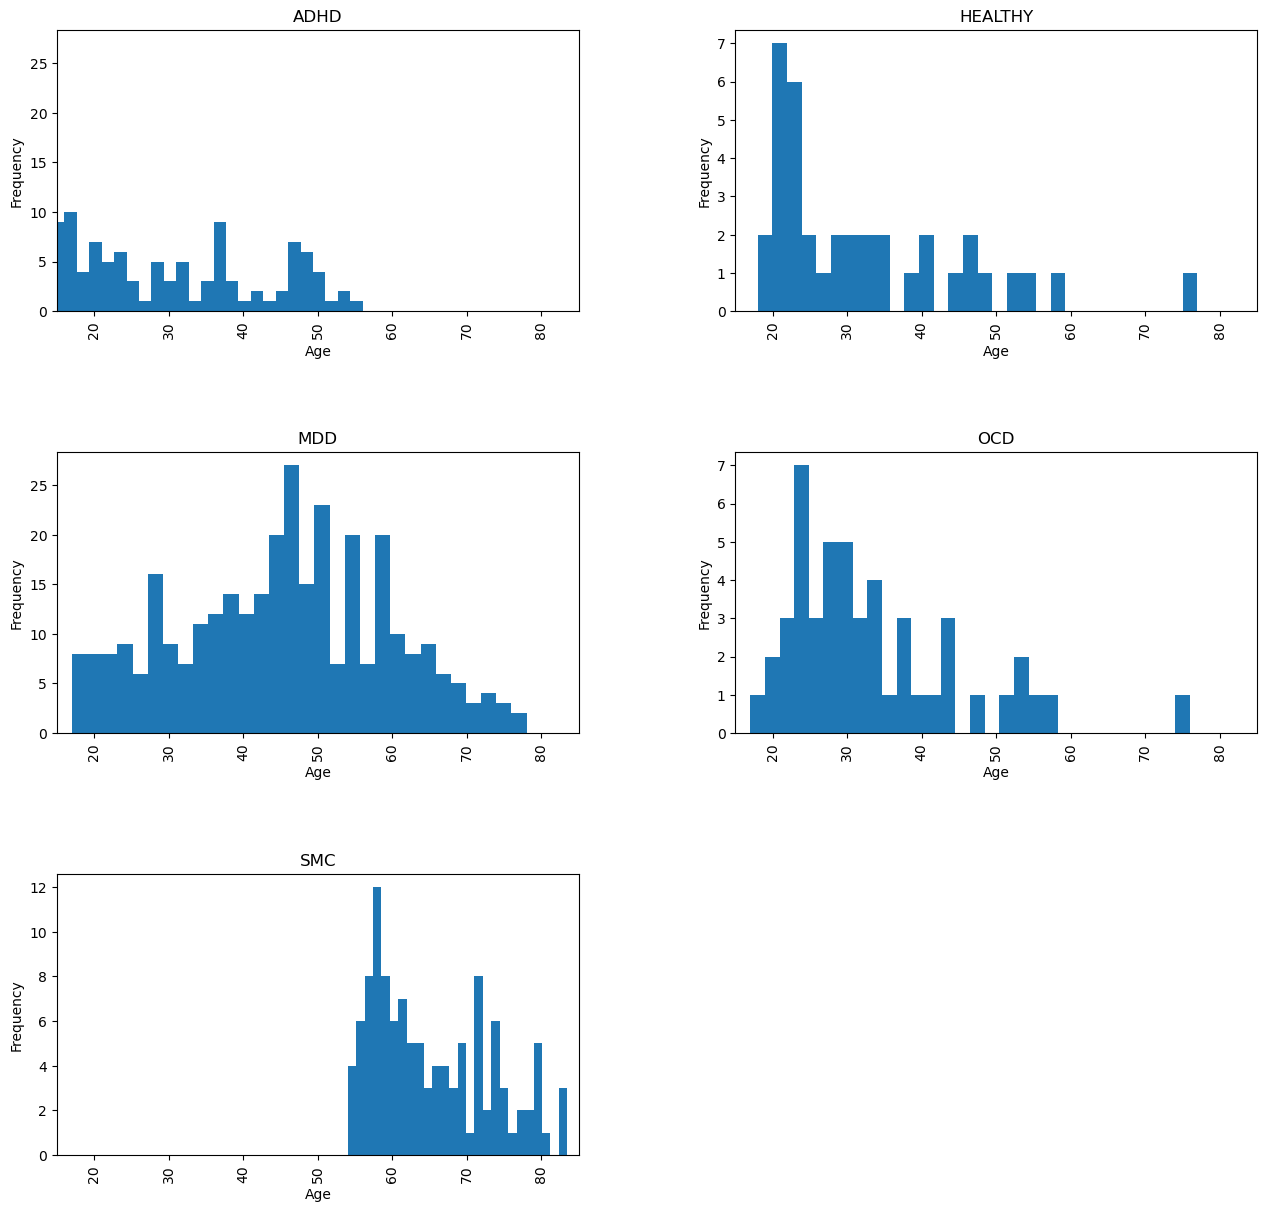

In [19]:
axes = df_descriptives.hist(column='age', by='diagnosis', bins=30, figsize=(15, 15))
for ax in axes.flatten():
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_xlim(15, 85)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)

#### Gender distribution per diagnosis:

In [20]:
df_descriptives.groupby('diagnosis')['gender'].describe()['mean'] # mean = % of male (male==1)

C:\Users\tuur\AppData\Local\Temp\ipykernel_15468\4230851126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_descriptives.groupby('diagnosis')['gender'].describe()['mean'] # mean = % of male (male==1)


diagnosis
ADHD       0.687500
HEALTHY    0.340426
MDD        0.464396
OCD        0.571429
SMC        0.445378
Name: mean, dtype: float64

#### Age distribution per gender:

In [21]:
df_descriptives.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,335.0,43.40597,17.713352,6.0,29.0,45.0,58.0,78.0
1,364.0,39.222527,20.630087,6.0,21.75,39.5,56.0,88.0


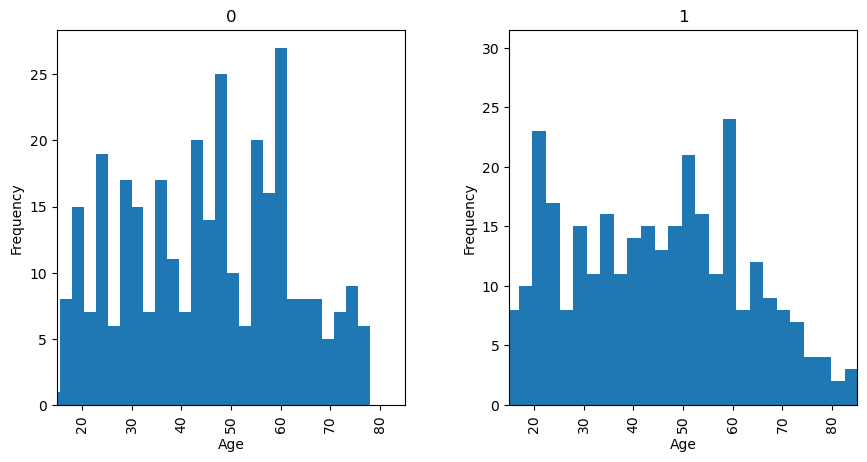

In [22]:
axes = df_descriptives.hist(column='age', by='gender', bins=30, figsize=(10, 5))
for ax in axes.flatten():
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_xlim(15, 85)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)

### Descriptives for subsample:

The following code is only possible after obtaining the subsampled dataset after feature extraction & selection. Continue with the other notebooks first to obtain the subsampled dataset.

In [5]:
df_participants = pd.read_pickle('df_participants.pkl')
sample_df = pd.read_pickle(r'D:\Documents\RU\Master_Neurobiology\Internship_jaar_2\Project\TD-BRAIN\TD-BRAIN_extracted_features\df_selected_stat_features.pkl')
sample_ids = sample_df['ID'].unique() # obtain unique IDs from subsampled dataframe containing epoched features
df_sample = df_participants[df_participants['participants_ID'].isin(sample_ids)] # filter participants dataframe to only include subsampled IDs
df_sample = df_sample[df_sample['sessID'] == 1] # filter first session
df_sample['diagnosis'].value_counts()

diagnosis
ADHD       45
HEALTHY    45
MDD        45
OCD        45
SMC        45
Name: count, dtype: int64

#### Age distribution per diagnosis:

In [6]:
df_sample.groupby('diagnosis')['age'].describe()

C:\Users\tuur\AppData\Local\Temp\ipykernel_10788\2828110540.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sample.groupby('diagnosis')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
ADHD,45.0,23.656000,14.243055,7.11,10.46,20.47,34.930,55.57
HEALTHY,35.0,32.292000,13.938994,18.30,21.26,28.46,40.125,77.35
MDD,45.0,42.668222,13.452678,18.66,35.38,42.25,49.590,70.61
OCD,45.0,32.487111,11.479229,17.39,24.31,30.22,36.610,76.07
SMC,43.0,63.548140,7.302789,54.47,58.08,61.41,69.620,83.31


C:\Users\tuur\AppData\Local\Temp\ipykernel_10788\2290089632.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axes = df_sample.hist(column='age', by='diagnosis', bins=30, figsize=(15, 15))


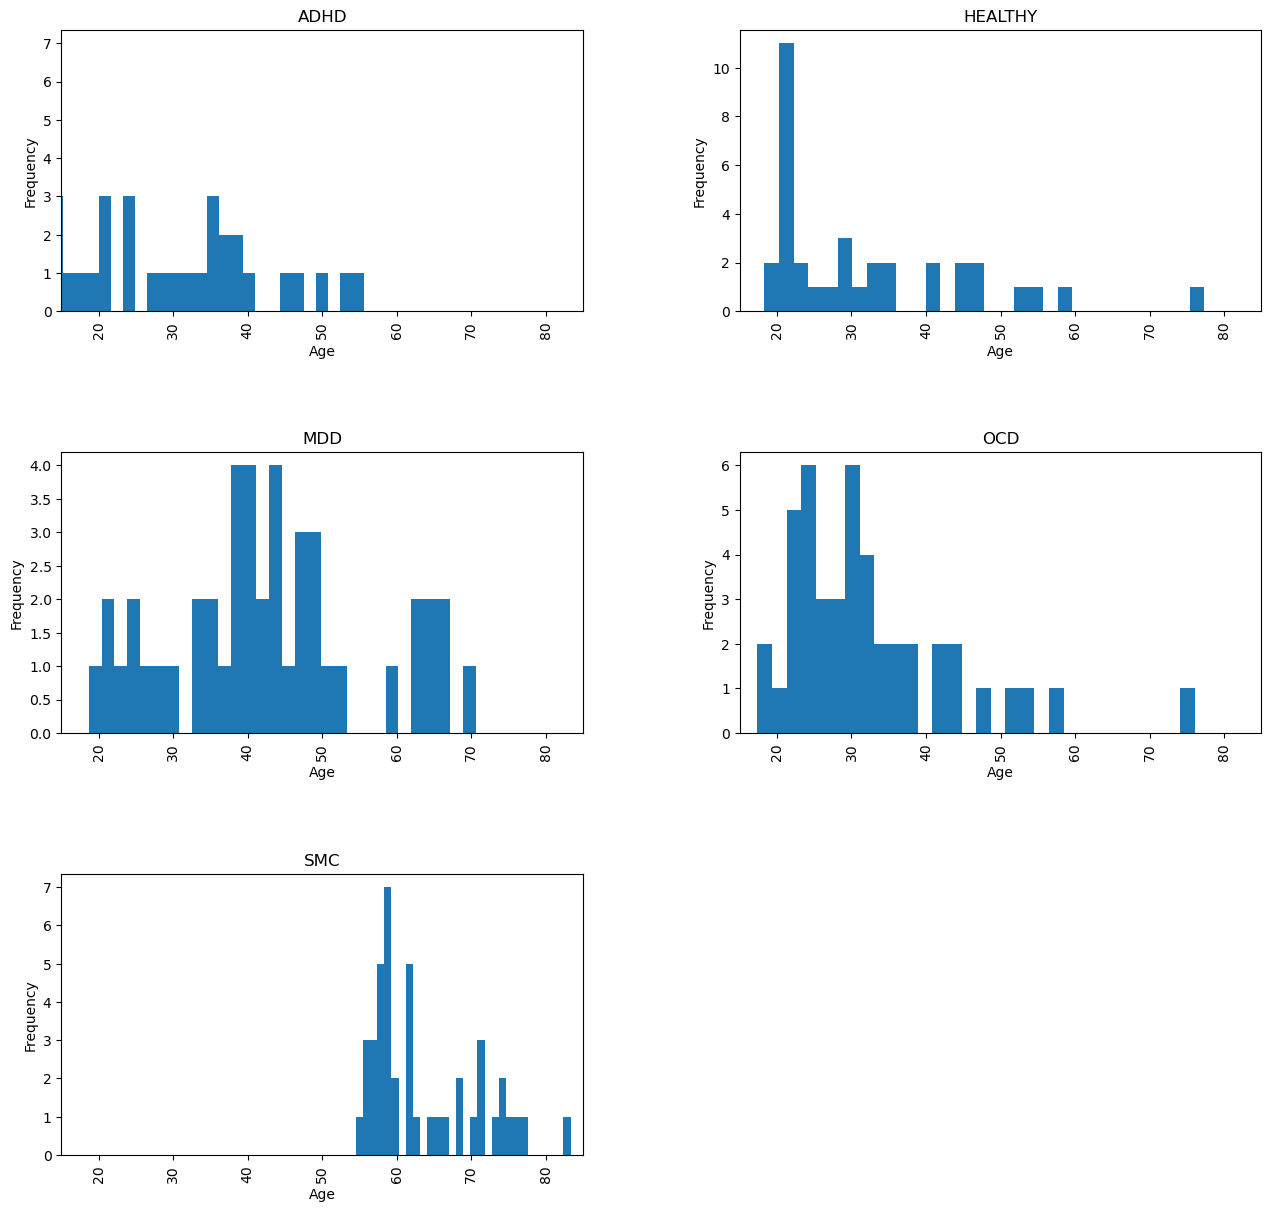

In [7]:
axes = df_sample.hist(column='age', by='diagnosis', bins=30, figsize=(15, 15))
for ax in axes.flatten():
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_xlim(15, 85)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)

#### Gender distribution per diagnosis:

In [8]:
df_sample.groupby('diagnosis')['gender'].describe()['mean'] # mean = % of male (male==1)

C:\Users\tuur\AppData\Local\Temp\ipykernel_10788\3782371414.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sample.groupby('diagnosis')['gender'].describe()['mean'] # mean = % of male (male==1)


diagnosis
ADHD       0.644444
HEALTHY    0.355556
MDD        0.377778
OCD        0.600000
SMC        0.377778
Name: mean, dtype: float64

#### percentage formally diagnosed

In [10]:
# get percentage of participants per diagnosis with no 'UNKNOWN' formal_status (so formally diagnosed)
df_sample[df_sample['formal_status'] != 'UNKNOWN']['diagnosis'].value_counts() / df_sample['diagnosis'].value_counts() * 100


diagnosis
ADHD        37.777778
HEALTHY    100.000000
MDD         46.666667
OCD         82.222222
SMC          0.000000
Name: count, dtype: float64